<a href="https://colab.research.google.com/github/makifcevik/python-notebooks/blob/main/403_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TASK 1:

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.util import random_noise

## 1. Read And Display The Image

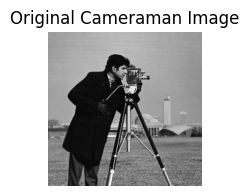

In [ ]:
# Read
OrigCam = cv2.imread('cameraman.jpg', cv2.IMREAD_GRAYSCALE)

# Display
plt.figure(figsize=(2, 2))
plt.imshow(OrigCam, cmap='gray')
plt.title('Original Cameraman Image')
plt.axis('off')
plt.show()

## 2. Add Noise

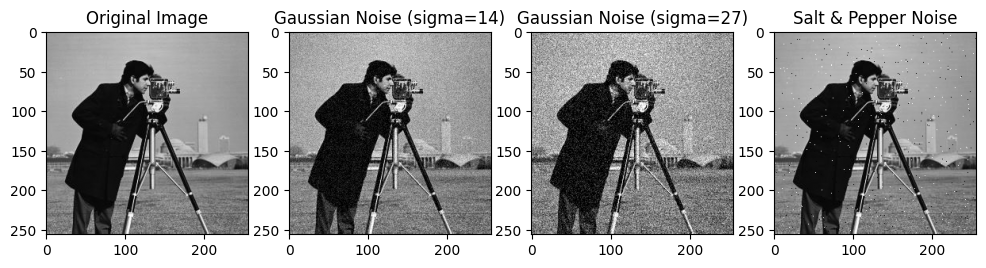

In [ ]:
# Convert to float for processing
OrigCam_float = OrigCam.astype('float32') / 255.0 # Noise functions expect the output range [0, 1]

# Add Gaussian noise (sigma=14 and sigma=27)
CamG14 = random_noise(OrigCam_float, mode='gaussian', var=(14/255)**2) # Square to make it "variance"
CamG27 = random_noise(OrigCam_float, mode='gaussian', var=(27/255)**2)

# Add Salt & Pepper noise (probability salt=0.7%)
SP = random_noise(OrigCam_float, mode='s&p', amount=0.007)

# Convert back to 8-bit format for display
CamG14 = (CamG14 * 255).astype('uint8')
CamG27 = (CamG27 * 255).astype('uint8')
SP = (SP * 255).astype('uint8')

# Display noisy images
plt.figure(figsize=(12, 3))
plt.subplot(141), plt.imshow(OrigCam, cmap='gray'), plt.title('Original Image')
plt.subplot(142), plt.imshow(CamG14, cmap='gray'), plt.title('Gaussian Noise (sigma=14)')
plt.subplot(143), plt.imshow(CamG27, cmap='gray'), plt.title('Gaussian Noise (sigma=27)')
plt.subplot(144), plt.imshow(SP, cmap='gray'), plt.title('Salt & Pepper Noise')
plt.show()

## 3. Calculate SNR

In [ ]:
def calculate_snr(original_img, noisy_img, in_db=True):
  signal_mean = np.mean(original_img)
  noise_std = np.std(original_img - noisy_img)

  if noise_std == 0:
      return float('inf')  # Perfect signal

  snr = signal_mean / noise_std

  return 20 * np.log10(snr) if in_db else snr

In [ ]:
# Calculate SNR for noisy images
snr_g14 = calculate_snr(OrigCam, CamG14)
snr_g27 = calculate_snr(OrigCam, CamG27)
snr_sp = calculate_snr(OrigCam, SP)

print(f"SNR for Gaussian noise (sigma=14): {snr_g14:.2f} dB")
print(f"SNR for Gaussian noise (sigma=27): {snr_g27:.2f} dB")
print(f"SNR for Salt & Pepper noise: {snr_sp:.2f} dB")

SNR for Gaussian noise (sigma=14): 0.11 dB
SNR for Gaussian noise (sigma=27): 0.76 dB
SNR for Salt & Pepper noise: 20.40 dB


## 4. Cleaning, Calculating SNR and Comparing

In [ ]:
kernel_sizes = [3, 5, 7]

In [ ]:
# Gaussian filtering for CamG14
gaussian_results_g14 = []
for ksize in kernel_sizes:
    denoised = cv2.GaussianBlur(CamG14, (ksize, ksize), 0)
    gaussian_results_g14.append(denoised)
    snr = calculate_snr(OrigCam, denoised)
    print(f"CamG14 Gaussian {ksize}x{ksize}: SNR = {snr:.2f} dB")

# Gaussian filtering for CamG27
gaussian_results_g27 = []
for ksize in kernel_sizes:
    denoised = cv2.GaussianBlur(CamG27, (ksize, ksize), 0)
    gaussian_results_g27.append(denoised)
    snr = calculate_snr(OrigCam, denoised)
    print(f"CamG27 Gaussian {ksize}x{ksize}: SNR = {snr:.2f} dB")

# Gaussian filtering for SP
gaussian_results_sp = []
for ksize in kernel_sizes:
    denoised = cv2.GaussianBlur(SP, (ksize, ksize), 0)
    gaussian_results_sp.append(denoised)
    snr = calculate_snr(OrigCam, denoised)
    print(f"SP Gaussian {ksize}x{ksize}: SNR = {snr:.2f} dB")

CamG14 Gaussian 3x3: SNR = -0.14 dB
CamG14 Gaussian 5x5: SNR = -0.11 dB
CamG14 Gaussian 7x7: SNR = -0.05 dB
CamG27 Gaussian 3x3: SNR = 0.06 dB
CamG27 Gaussian 5x5: SNR = 0.03 dB
CamG27 Gaussian 7x7: SNR = 0.04 dB
SP Gaussian 3x3: SNR = 0.21 dB
SP Gaussian 5x5: SNR = 0.07 dB
SP Gaussian 7x7: SNR = 0.03 dB


In [ ]:
# Median filtering for CamG14
median_results_g14 = []
for ksize in kernel_sizes:
    denoised = cv2.medianBlur(CamG14, ksize)
    median_results_g14.append(denoised)
    snr = calculate_snr(OrigCam, denoised)
    print(f"CamG14 Median {ksize}x{ksize}: SNR = {snr:.2f} dB")

# Median filtering for CamG27
median_results_g27 = []
for ksize in kernel_sizes:
    denoised = cv2.medianBlur(CamG27, ksize)
    median_results_g27.append(denoised)
    snr = calculate_snr(OrigCam, denoised)
    print(f"CamG27 Median {ksize}x{ksize}: SNR = {snr:.2f} dB")

# Median filtering for SP
median_results_sp = []
for ksize in kernel_sizes:
    denoised = cv2.medianBlur(SP, ksize)
    median_results_sp.append(denoised)
    snr = calculate_snr(OrigCam, denoised)
    print(f"SP Median {ksize}x{ksize}: SNR = {snr:.2f} dB")

CamG14 Median 3x3: SNR = -0.09 dB
CamG14 Median 5x5: SNR = -0.04 dB
CamG14 Median 7x7: SNR = 0.04 dB
CamG27 Median 3x3: SNR = 0.14 dB
CamG27 Median 5x5: SNR = 0.07 dB
CamG27 Median 7x7: SNR = 0.08 dB
SP Median 3x3: SNR = 0.80 dB
SP Median 5x5: SNR = 0.17 dB
SP Median 7x7: SNR = 0.07 dB


(<Axes: title={'center': 'Gaussian sp 7x7'}>,
 Text(0.5, 1.0, 'Gaussian sp 7x7'))

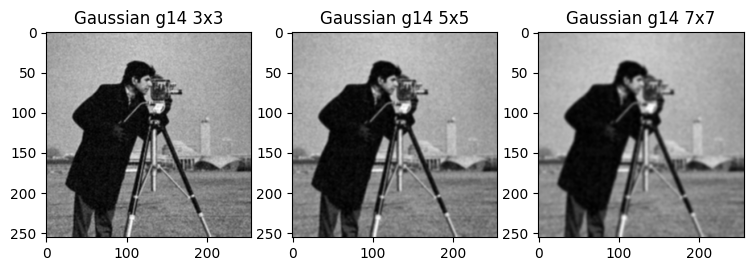

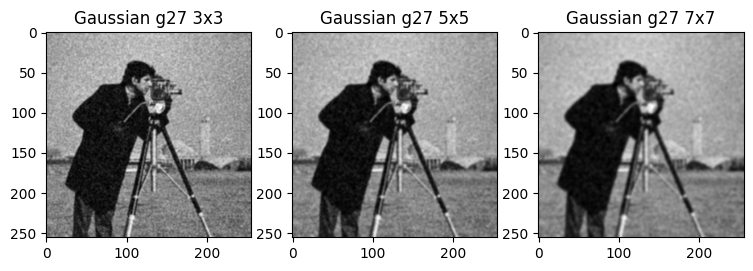

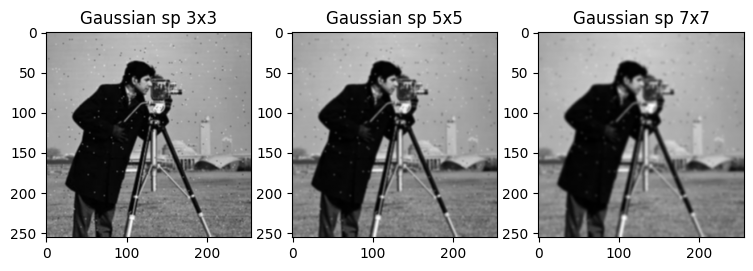

In [ ]:
plt.figure(figsize=(9, 3))
plt.subplot(131), plt.imshow(gaussian_results_g14[0], cmap='gray'), plt.title('Gaussian g14 3x3')
plt.subplot(132), plt.imshow(gaussian_results_g14[1], cmap='gray'), plt.title('Gaussian g14 5x5')
plt.subplot(133), plt.imshow(gaussian_results_g14[2], cmap='gray'), plt.title('Gaussian g14 7x7')

plt.figure(figsize=(9, 3))
plt.subplot(131), plt.imshow(gaussian_results_g27[0], cmap='gray'), plt.title('Gaussian g27 3x3')
plt.subplot(132), plt.imshow(gaussian_results_g27[1], cmap='gray'), plt.title('Gaussian g27 5x5')
plt.subplot(133), plt.imshow(gaussian_results_g27[2], cmap='gray'), plt.title('Gaussian g27 7x7')

plt.figure(figsize=(9, 3))
plt.subplot(131), plt.imshow(gaussian_results_sp[0], cmap='gray'), plt.title('Gaussian sp 3x3')
plt.subplot(132), plt.imshow(gaussian_results_sp[1], cmap='gray'), plt.title('Gaussian sp 5x5')
plt.subplot(133), plt.imshow(gaussian_results_sp[2], cmap='gray'), plt.title('Gaussian sp 7x7')

(<Axes: title={'center': 'Median sp 7x7'}>,
 Text(0.5, 1.0, 'Median sp 7x7'))

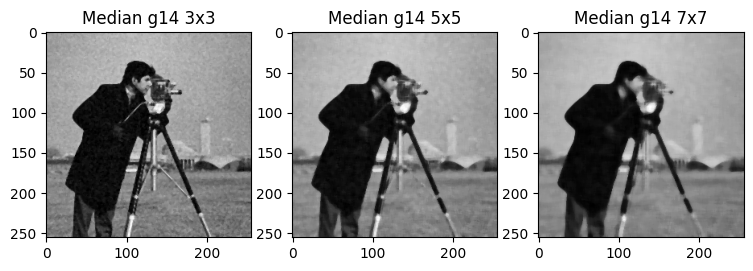

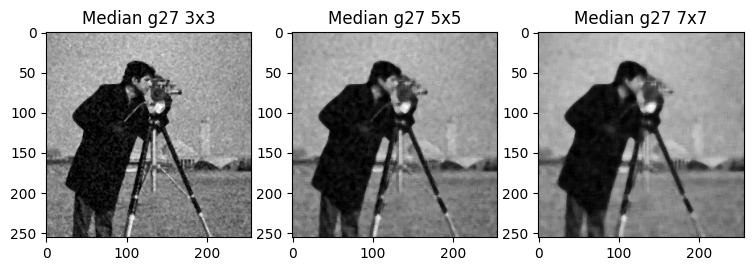

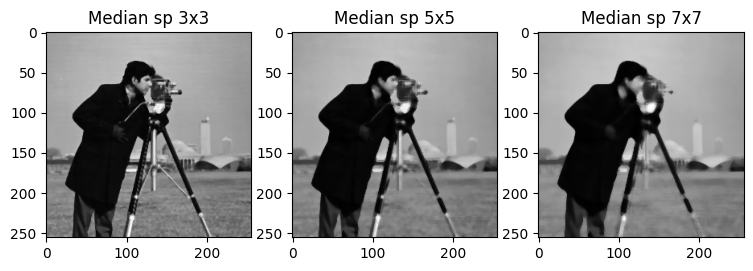

In [ ]:
plt.figure(figsize=(9, 3))
plt.subplot(131), plt.imshow(median_results_g14[0], cmap='gray'), plt.title('Median g14 3x3')
plt.subplot(132), plt.imshow(median_results_g14[1], cmap='gray'), plt.title('Median g14 5x5')
plt.subplot(133), plt.imshow(median_results_g14[2], cmap='gray'), plt.title('Median g14 7x7')

plt.figure(figsize=(9, 3))
plt.subplot(131), plt.imshow(median_results_g27[0], cmap='gray'), plt.title('Median g27 3x3')
plt.subplot(132), plt.imshow(median_results_g27[1], cmap='gray'), plt.title('Median g27 5x5')
plt.subplot(133), plt.imshow(median_results_g27[2], cmap='gray'), plt.title('Median g27 7x7')

plt.figure(figsize=(9, 3))
plt.subplot(131), plt.imshow(median_results_sp[0], cmap='gray'), plt.title('Median sp 3x3')
plt.subplot(132), plt.imshow(median_results_sp[1], cmap='gray'), plt.title('Median sp 5x5')
plt.subplot(133), plt.imshow(median_results_sp[2], cmap='gray'), plt.title('Median sp 7x7')

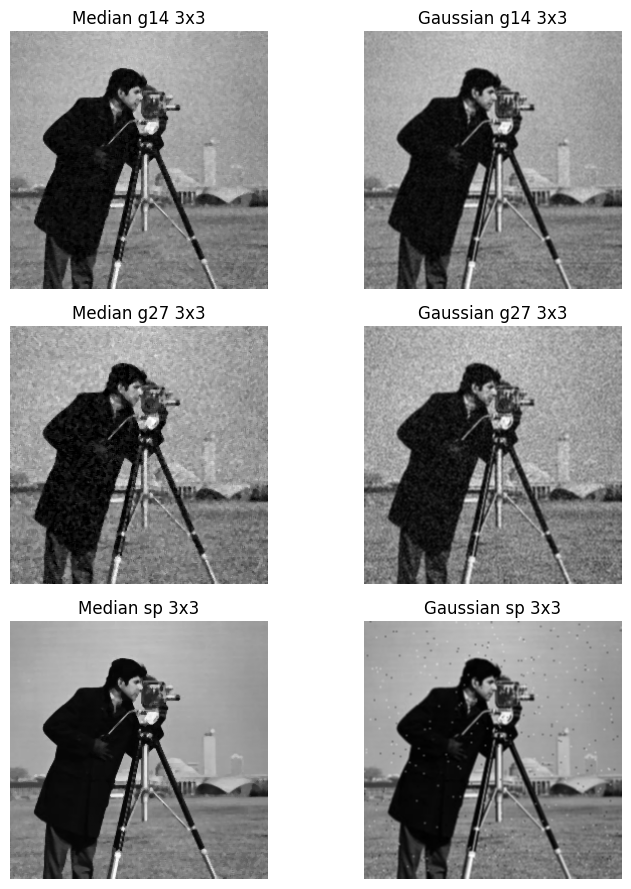

In [ ]:
plt.figure(figsize=(8, 9))

# Median results (left column)
plt.subplot(3, 2, 1)
plt.imshow(median_results_g14[0], cmap='gray')
plt.title('Median g14 3x3')
plt.axis('off')

plt.subplot(3, 2, 3)
plt.imshow(median_results_g27[0], cmap='gray')
plt.title('Median g27 3x3')
plt.axis('off')

plt.subplot(3, 2, 5)
plt.imshow(median_results_sp[0], cmap='gray')
plt.title('Median sp 3x3')
plt.axis('off')

# Gaussian results (right column)
plt.subplot(3, 2, 2)
plt.imshow(gaussian_results_g14[0], cmap='gray')
plt.title('Gaussian g14 3x3')
plt.axis('off')

plt.subplot(3, 2, 4)
plt.imshow(gaussian_results_g27[0], cmap='gray')
plt.title('Gaussian g27 3x3')
plt.axis('off')

plt.subplot(3, 2, 6)
plt.imshow(gaussian_results_sp[0], cmap='gray')
plt.title('Gaussian sp 3x3')
plt.axis('off')

plt.tight_layout()
plt.show()


## 5. Comments on Results

1. Gaussian filters are good for gaussian noise.
2. Larger Gaussian filter perform better for denoising but they blur the image.
3. Median filters are perfect for salt & pepper noise.
4. Median filters outperformed Gaussian variants in all cases.